In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [30]:
data = pd.read_csv('auto93.csv')

In [31]:
data.head()

,Clndrs,Volume,HpX,Model,origin,Lbs-,Acc+,Mpg+
0,8,304.0,193,70,1,4732,18.5,10
1,8,360.0,215,70,1,4615,14.0,10
2,8,307.0,200,70,1,4376,15.0,10
3,8,318.0,210,70,1,4382,13.5,10
4,8,429.0,208,72,1,4633,11.0,10


In [32]:
X = data[['Clndrs', 'Volume', 'HpX', 'Model', 'origin']]
y = data[['Lbs-', 'Acc+', 'Mpg+']]

In [33]:
X.replace('?', np.nan, inplace=True)
X = StandardScaler().fit_transform(X.astype(float))
print(X.shape)

(398, 5)


/var/folders/mf/pc621dwd2z3_jmf5p7t1zn2r0000gn/T/ipykernel_8861/156937011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


In [34]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [37]:
dbscan.fit(X)

DBSCAN()

In [38]:
labels = dbscan.labels_
data['Cluster'] = labels

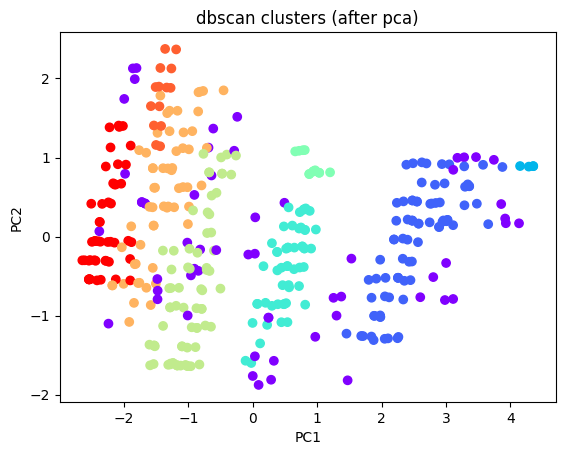

In [39]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('dbscan clusters (after pca)')
plt.show()

In [40]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters formed: {n_clusters}')

Number of clusters formed: 8
